<a href="https://colab.research.google.com/github/JyothiKarna/High-Performance-Computing/blob/main/Siva_Jyothi_Karna_Pytorch_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch homework

### Instructions
- Make a copy of this notebook in your own Colab and complete the questions there.
- You can add more cells if necessary. You may also add descriptions to your code, though it is not mandatory.
- Make sure the notebook can run through by *Runtime -> Run all*. **Keep all cell outputs** for grading.
- Submit the link of your notebook 
- Please **enable editing or comments** so that you can receive feedback from TAs.

Install PyTorch and Skorch.

In [ ]:
!pip install -q torch skorch torchvision torchtext

     |████████████████████████████████| 193 kB 14.9 MB/s 


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import skorch
import sklearn
import numpy as np
import matplotlib.pyplot as plt

## 1. Tensor Operations (40 points)

Tensor operations are important in deep learning models. In this part, you are required to implement some common tensor operations in PyTorch.

### 1) Tensor squeezing, unsqueezing and viewing

Tensor squeezing, unsqueezing and viewing are important methods to change the dimension of a Tensor, and the corresponding functions are [torch.squeeze](https://pytorch.org/docs/stable/torch.html#torch.squeeze), [torch.unsqueeze](https://pytorch.org/docs/stable/torch.html#torch.unsqueeze) and [torch.Tensor.view](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.view). Please read the documents of the functions, and finish the following practice.

In [ ]:
# x is a tensor with size being (3, 2)
x = torch.Tensor([[1, 2], [3, 4], [5, 6]])
print(x)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


In [ ]:
# Add two new dimensions to x by using the function torch.unsqueeze, so that the size of x becomes (3, 1, 2, 1).
x = torch.unsqueeze(x,1)
x = torch.unsqueeze(x,-1)
print(x.shape)

torch.Size([3, 1, 2, 1])


In [ ]:
# Remove the two dimensions justed added by using the function torch.squeeze, and change the size of x back to (3, 2).
x = torch.squeeze(x,1)
x = torch.squeeze(x,2)
print(x.shape)

torch.Size([3, 2])


In [ ]:
# x is now a two-dimensional tensor, or in other words a matrix. Now use the function torch.Tensor.view and change x to a one-dimensional vector with size being (6).
x = x.view(6)
print("One Dimensional Vector: ", x)
print(x.shape)

One Dimensional Vector:  tensor([1., 2., 3., 4., 5., 6.])
torch.Size([6])


### 2) Tensor concatenation and stack

Tensor concatenation and stack are operations to combine small tensors into big tensors. The corresponding functions are [torch.cat](https://pytorch.org/docs/stable/torch.html#torch.cat) and [torch.stack](https://pytorch.org/docs/stable/torch.html#torch.stack). Please read the documents of the functions, and finish the following practice.

In [ ]:
# x is a tensor with size being (3, 2)
x = torch.Tensor([[1, 2], [3, 4], [5, 6]])
print("Size of x Tensor: ", x.shape)

# y is a tensor with size being (3, 2)
y = torch.Tensor([[-1, -2], [-3, -4], [-5, -6]])
print("Size of y Tensor: ", y.shape)

Size of x Tensor:  torch.Size([3, 2])
Size of y Tensor:  torch.Size([3, 2])


In [ ]:
# Our goal is to generate a tensor z with size as (2, 3, 2), and z[0,:,:] = x, z[1,:,:] = y.
# Use torch.stack to generate such a z
z = torch.stack((x,y),0)
print("Stack z: ",z)

Stack z:  tensor([[[ 1.,  2.],
         [ 3.,  4.],
         [ 5.,  6.]],

        [[-1., -2.],
         [-3., -4.],
         [-5., -6.]]])


In [ ]:
# Use torch.cat and torch.unsqueeze to generate such a z
z = torch.cat((x,y),0)
print("Concatenate z: ",z)
print(z.shape)

# To unsqueeze data:
z = torch.unsqueeze(z,1)
print(z.shape)

Concatenate z:  tensor([[ 1.,  2.],
        [ 3.,  4.],
        [ 5.,  6.],
        [-1., -2.],
        [-3., -4.],
        [-5., -6.]])
torch.Size([6, 2])
torch.Size([6, 1, 2])


### 3) Tensor expansion

Tensor expansion is to expand a tensor into a larger tensor along singleton dimensions. The corresponding functions are [torch.Tensor.expand](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.expand) and [torch.Tensor.expand_as](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.expand_as). Please read the documents of the functions, and finish the following practice. 

In [ ]:
# x is a tensor with size being (3)
x = torch.Tensor([1, 2, 3])
print(x)

tensor([1., 2., 3.])


In [ ]:
# Our goal is to generate a tensor z with size (2, 3), so that z[0,:,:] = x, z[1,:,:] = x.

# [TO DO]
# Change the size of x into (1, 3) by using torch.unsqueeze.
x = torch.unsqueeze(x,0)
print("Amended unsqueeze tensor: ",x)
print(x.shape)

Amended unsqueeze tensor:  tensor([[1., 2., 3.]])
torch.Size([1, 3])


In [ ]:
# [TO DO]
# Then expand the new tensor to the target tensor by using torch.Tensor.expand.
x_new = x.expand(3,-1)
print("Expand the new tensor: ", x_new)
x_new.size()

Expand the new tensor:  tensor([[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]])


torch.Size([3, 3])

### 4) Tensor reduction in a given dimension

In deep learning, we often need to compute the mean/sum/max/min value in a given dimension of a tensor. Please read the document of [torch.mean](https://pytorch.org/docs/stable/torch.html#torch.mean), [torch.sum](https://pytorch.org/docs/stable/torch.html#torch.sum), [torch.max](https://pytorch.org/docs/stable/torch.html#torch.max), [torch.min](https://pytorch.org/docs/stable/torch.html#torch.min), [torch.topk](https://pytorch.org/docs/stable/torch.html#torch.topk), and finish the following practice.

In [ ]:
# x is a random tensor with size being (10, 50)
x = torch.randn(10,50)
print("Random tensor with size (10,50): ", x)
print(x.shape)

# Compute the mean value for each row of x.
# You need to generate a tensor x_mean of size (10), and x_mean[k, :] is the mean value of the k-th row of x.

mean = torch.mean(x, axis=1)
print("Mean value for each row of x: ", mean)
print(mean.shape)

print("Mean value of the k-th row of x: ", mean.data[5])

Random tensor with size (10,50):  tensor([[-8.5858e-02,  2.5602e+00,  4.1812e-02,  8.0594e-01, -1.5743e-01,
          7.7663e-01,  3.7708e-01, -6.2573e-01, -4.4539e-01, -1.2694e+00,
          1.3030e+00,  1.1802e-01, -4.9406e-01, -1.1608e+00,  3.5191e+00,
         -1.1971e+00, -1.8871e-01,  1.1577e+00,  3.8007e-01, -3.1119e-01,
         -7.7780e-01, -7.0767e-01, -5.7530e-02, -6.4098e-01, -1.0862e+00,
          7.0629e-02,  9.0801e-01, -1.1436e+00, -1.0673e+00,  1.2744e+00,
          1.6051e+00,  4.5315e-02,  6.3402e-01, -2.0864e-01,  1.2202e+00,
          1.7874e+00,  2.0678e+00,  1.0857e+00,  1.8517e-01,  6.2265e-01,
         -2.9751e-01, -2.2185e-01,  1.6758e-01,  2.2956e+00,  8.0153e-01,
         -2.0041e-01, -4.6298e-01,  1.1350e-01,  7.6735e-01, -1.4846e-01],
        [-1.9866e-02, -9.6344e-01,  1.2482e+00, -4.0255e-01, -1.1671e+00,
          8.9451e-01, -1.2777e+00, -1.2267e-02, -6.9263e-01,  6.8580e-01,
         -5.5002e-01, -4.5871e-01, -1.1414e+00, -9.6169e-01,  8.1608e-01,
   

In [ ]:
# Compute the sum value for each row of x.
# You need to generate a tensor x_sum of size (10).
sum = torch.sum(x,1)
print("Sum value of each row: ", sum)

Sum value of each row:  tensor([13.7348,  2.1271,  2.1797,  2.0186, -1.1766, -2.5645, -3.1515, -9.3138,
        -7.1022,  9.4039])


In [ ]:
# Compute the max value for each row of x.
# You need to generate a tensor x_max of size (10).
max = torch.max(x,1, out=None)
print("Max value of each row: ", max)

Max value of each row:  torch.return_types.max(
values=tensor([3.5191, 1.7975, 2.2867, 3.2168, 1.7338, 2.0632, 2.0072, 1.9675, 1.8101,
        2.2997]),
indices=tensor([14, 39, 46, 15,  9, 43, 42, 16, 14, 21]))


In [ ]:
# Compute the min value for each row of x.
# You need to generate a tensor x_min of size (10).
min = torch.min(x,1)
print("Min value of each row: ", min)

Min value of each row:  torch.return_types.min(
values=tensor([-1.2694, -2.4178, -1.6631, -1.9441, -2.6644, -1.9707, -2.4231, -1.9711,
        -2.9970, -1.6562]),
indices=tensor([ 9, 35,  9, 39, 38, 37,  0, 32, 41, 38]))


In [ ]:
# Compute the top-5 values for each row of x.
# You need to generate a tensor x_mean of size (10, 5), and x_top[k, :] is the top-5 values of each row in x.
top_5 = torch.topk(x, 5)
print("Top 5 values of each row: ", top_5)

Top 5 values of each row:  torch.return_types.topk(
values=tensor([[3.5191, 2.5602, 2.2956, 2.0678, 1.7874],
        [1.7975, 1.5218, 1.5007, 1.4868, 1.4335],
        [2.2867, 2.1095, 2.0308, 1.8630, 1.7074],
        [3.2168, 2.3876, 1.6332, 1.6088, 1.5149],
        [1.7338, 1.4202, 1.2888, 1.2792, 1.2274],
        [2.0632, 1.8683, 1.5305, 1.2107, 1.1330],
        [2.0072, 1.8521, 1.6413, 1.5380, 1.3488],
        [1.9675, 1.8155, 1.5568, 1.4925, 1.4418],
        [1.8101, 1.6857, 1.6479, 1.3409, 1.3001],
        [2.2997, 2.0156, 1.7944, 1.6248, 1.5958]]),
indices=tensor([[14,  1, 43, 36, 35],
        [39, 43, 45, 23, 30],
        [46, 10, 34, 21, 45],
        [15, 45, 23, 43, 26],
        [ 9, 37, 34, 35, 39],
        [43,  4, 16, 36, 32],
        [42,  2, 39, 36, 15],
        [16,  2,  8, 10, 33],
        [14, 27, 43, 28,  0],
        [21, 34,  2,  7, 22]]))


## Convolutional Neural Networks (60 points)



Implement a convolutional neural network for image classification on CIFAR-10 dataset.

CIFAR-10 is an image dataset of 10 categories. Each image has a size of 32x32 pixels. The following code will download the dataset, and split it into `train` and `test`. For this question, we use the default validation split generated by Skorch.

In [ ]:
train = torchvision.datasets.CIFAR10("./data", train=True, download=True)
test = torchvision.datasets.CIFAR10("./data", train=False, download=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler


# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


The following code visualizes some samples in the dataset. You may use it to debug your model if necessary.

Files already downloaded and verified
Files already downloaded and verified


Text(0.5, 1.0, 'ship')

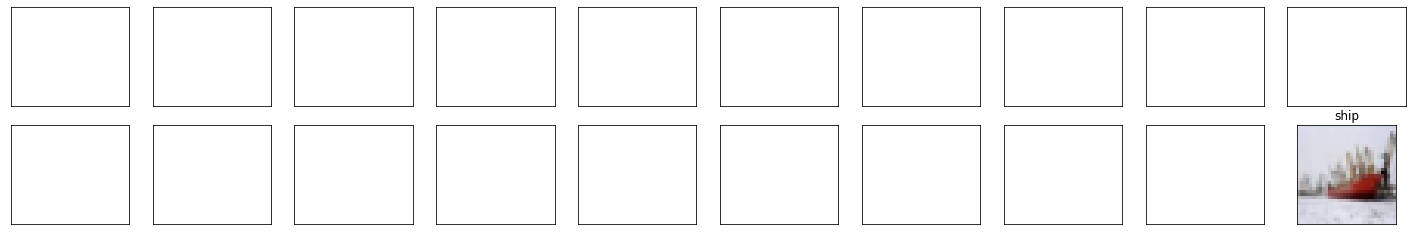

In [ ]:
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation
valid_size = 0.2

# convert data to a normalized torch.FloatTensor
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

# choose the training and test datasets
train_data = datasets.CIFAR10('data', train=True,
                              download=True, transform=transform)
test_data = datasets.CIFAR10('data', train=False,
                             download=True, transform=transform)

# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

# specify the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']


# Visualize the data set in order to do feature extraction
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))# display 20 images
for idx in np.arange(20):
  ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
imshow(images[idx])
ax.set_title(classes[labels[idx]])

### 1) Basic CNN implementation


Consider a basic CNN model

- It has 3 convolutional layers, followed by a linear layer.
- Each convolutional layer has a kernel size of 3, a padding of 1.
- ReLU activation is applied on every hidden layer.

Please implement this model in the following section. You will need to tune the hyperparameters and fill the results in the table.

#### a) Implement convolutional layers (20 points)

Implement the initialization function and the forward function of the CNN.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):  
  
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)  
    
    
  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 5 * 5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

# create a complete CNN
model = Net()
print(model)

# move tensors to GPU if CUDA is available
if train_on_gpu:
  model.cuda()

import torch.optim as optim # specify loss function
criterion = nn.CrossEntropyLoss() # specify optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

# number of epochs to train the model
n_epochs = 30

#List to store loss to visualize
train_losslist = []
valid_loss_min = np.Inf 

# track change in validation loss

for epoch in range(1, n_epochs):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    

# train the model #

    model.train()
    for data, target in train_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
# validate the model #

    model.eval()
    for data, target in valid_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)    
    train_losslist.append(train_loss)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_cifar.pt')
        valid_loss_min = valid_loss



Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
Epoch: 1 	Training Loss: 1.738143 	Validation Loss: 0.387248
Validation loss decreased (inf --> 0.387248).  Saving model ...
Epoch: 2 	Training Loss: 1.400517 	Validation Loss: 0.322652
Validation loss decreased (0.387248 --> 0.322652).  Saving model ...
Epoch: 3 	Training Loss: 1.227258 	Validation Loss: 0.293304
Validation loss decreased (0.322652 --> 0.293304).  Saving model ...
Epoch: 4 	Training Loss: 1.135676 	Validation Loss: 0.285008
Validation loss decreased (0.293304 --> 0.285008).  Saving model ...
Epoch: 5 	Training Loss: 1.074916 	Validation Loss: 0.265907
Validation loss decreased (0.2

ValueError: ignored

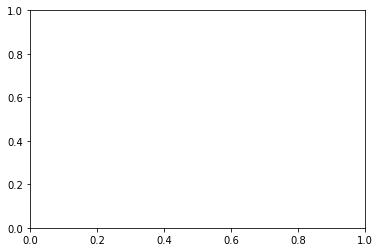

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(n_epochs, train_losslist)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Performance of Model ")
plt.show()

#### b) Tune hyperparameters (20 points)


Train the CNN model on CIFAR-10 dataset. Tune the number of channels, optimizer, learning rate and the number of epochs for best validation accuracy.

In [ ]:
# implement hyperparameters here
model = skorch.NeuralNetClassifier(CNN, criterion=torch.nn.CrossEntropyLoss,
                                   device="cuda")
class CNN(nn.Module):
   

    def __init__(self):
        
        super(CNN, self).__init__()

        self.conv_layer = nn.Sequential(

            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 2
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.05),

            # Conv Layer block 3
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )


        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.1),
            nn.Linear(4096, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1),
            nn.Linear(512, 10)
        )


    def forward(self, x):
        """Perform forward."""
        
        # conv layers
        x = self.conv_layer(x)
        
        # flatten
        x = x.view(x.size(0), -1)
        
        # fc layer
        x = self.fc_layer(x)

        return x


# implement input normalization & type cast here
model.fit(train.data, train.targets)


In [ ]:
import torch.optim as optim# specify loss function
criterion = nn.CrossEntropyLoss()# specify optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001)

Write down **validation accuracy** of your model under different hyperparameter settings. Note the validation set is automatically split by Skorch during `model.fit()`.

**Hint:** You may need more epochs for SGD than Adam.

| #channel for each layer \ optimizer | SGD   | Adam  |
|-------------------------------------|-------|-------|
| (128, 128, 128)                     |       |       |
| (256, 256, 256)                     |       |       |
| (512, 512, 512)                     |       |       |


#### c) Use larger CNN model (20 points)

Add more Convolution/BatchNorm/Pooling/DropOut/Linear layers to improve the accuracy. Higher accuracy will get higher grade.